In [265]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_iris, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline 
sns.set(style="ticks")

In [186]:
diabetes = load_diabetes()

In [187]:
df_diabetes = pd.DataFrame(diabetes.data,columns = diabetes.feature_names)
df_diabetes['target'] = pd.Series(diabetes.target)
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [188]:
corr = df_diabetes.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1,0.0881614,0.241013,0.0352768,0.142637,-0.37909,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.0881614,1,0.395415,0.249777,0.26117,-0.366811,0.413807,0.446159,0.38868,0.58645
bp,0.335427,0.241013,0.395415,1,0.24247,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.0352768,0.249777,0.24247,1,0.896663,0.0515194,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.26117,0.185558,0.896663,1,-0.196455,0.659817,0.318353,0.2906,0.174054
s3,-0.075181,-0.37909,-0.366811,-0.178761,0.0515194,-0.196455,1,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1,0.46467,0.565883
s6,0.301731,0.208133,0.38868,0.390429,0.325717,0.2906,-0.273697,0.417212,0.46467,1,0.382483


In [251]:
X = diabetes['data']
Y = diabetes['target']
X = (X-X.mean())/X.std()


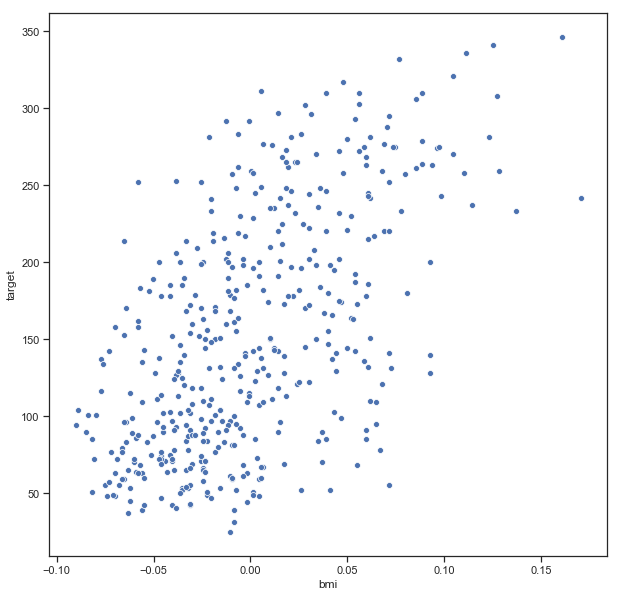

In [252]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='bmi', y='target', data=df_diabetes)

In [253]:
# Аналитическое вычисление коэффициентов регрессии
def analytic_regr_coef(x_array : np.ndarray, 
                       y_array : np.ndarray) -> Tuple[float, float]:
    x_mean = np.mean(x_array)
    y_mean = np.mean(y_array)
    var1 = np.sum([(x-x_mean)**2 for x in x_array])
    cov1 = np.sum([(x-x_mean)*(y-x_mean) for x, y in zip(x_array, y_array)])
    b1 = cov1 / var1
    b0 = y_mean - b1*x_mean
    return b0, b1

In [254]:
x_array = df_diabetes['bmi'].values
y_array = df_diabetes['target'].values
X_train,X_test,y_train,y_test = train_test_split(x_array,y_array,random_state = 0)

In [255]:
b0,b1 = analytic_regr_coef(X_train,y_train)
b0,b1

(153.2256898080062, 1016.9235389404748)

In [273]:
reg1 = LinearRegression().fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
pred = reg1.predict(X_test.reshape(-1,1))
reg1.score(X_test.reshape(-1,1),y_test.reshape(-1,1))


0.15772057992609445

In [257]:
# Вычисление значений y на основе x для регрессии
def y_regr(X_test : np.ndarray, b0: float, b1: float) -> np.ndarray:
    res = [b1*x+b0 for x in X_test]
    return res

In [258]:
y_array_regr = y_regr(X_test,b0,b1)

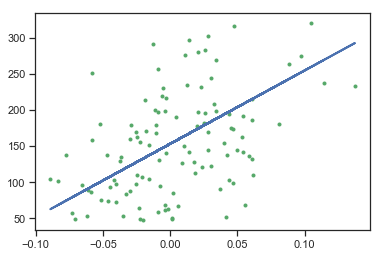

In [259]:
plt.plot(X_test, y_test, 'g.')
plt.plot(X_test, y_array_regr, 'b', linewidth=2.0)
plt.show()

<h3>Изучем качества регресии</h3>

In [260]:
mean_absolute_error(y_test,y_array_regr)

53.339879574602286

In [261]:
mean_squared_error(y_test,y_array_regr)

4181.423410366638

In [262]:
median_absolute_error(y_test, y_array_regr)

43.027863272360065

<h3>SVM</h3>

In [277]:
LSVR = LinearSVR(C=1.0, max_iter=10000)

In [278]:
LSVR.fit(X_train.reshape(-1, 1), y_train.reshape(-1,1))
diabetes_y_pred = LSVR.predict(X_test.reshape(-1, 1))
# mean_absolute_error(y_test,diabetes_y_pred)
LSVR.score(X_test.reshape(-1,1),y_test.reshape(-1,1))

C:\Users\MI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.5595491489515287

In [279]:
mae = mean_absolute_error(y_test,diabetes_y_pred)
mse = mean_squared_error(y_test,diabetes_y_pred)
mdae = median_absolute_error(y_test, diabetes_y_pred)
print("Средняя абсолютная ошибкаа - {} \nСредняя квадратическая ошибка - {} \nАбсолютная ошибка по медиане - {}"
      .format(mae,mse,mdae))

Средняя абсолютная ошибкаа - 68.38249275094039 
Средняя квадратическая ошибка - 7742.247009277626 
Абсолютная ошибка по медиане - 50.72613510099035


In [280]:
def plot_regr(clf):
    title = clf.__repr__
    clf.fit(X_train.reshape(-1, 1), y_train)
    boston_y_pred = clf.predict(X_train.reshape(-1, 1))
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_title(title)
    ax.plot(X_train, y_train, 'b.')
    ax.plot(X_test, boston_y_pred, 'ro')
    plt.show()

ValueError: x and y must have same first dimension, but have shapes (111,) and (331,)

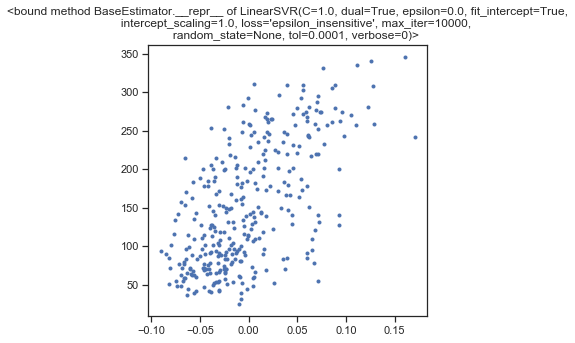

In [250]:
plot_regr(LinearSVR(C=1.0, max_iter=10000))

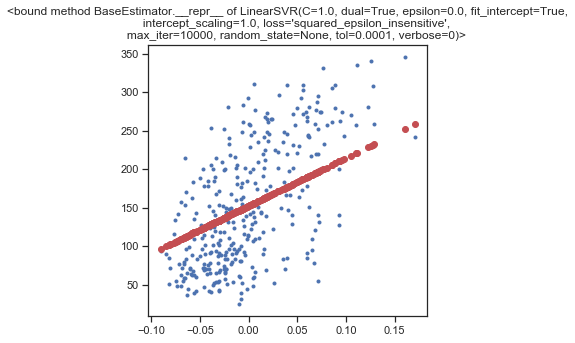

In [227]:
plot_regr(LinearSVR(C=1.0, loss='squared_epsilon_insensitive', max_iter=10000))

<h3>Деревья решений</h3>

In [228]:
def plot_tree_regression(X_train, y_train, X_test):
    """
    Построение деревьев и вывод графиков для заданного датасета
    """

    # Обучение регрессионной модели
    regr_1 = DecisionTreeRegressor(max_depth=3)
    regr_2 = DecisionTreeRegressor(max_depth=10)
    regr_1.fit(X_train, y_train)
    regr_2.fit(X_train, y_train)

    # Предсказание
    y_1 = regr_1.predict(X_test)
    y_2 = regr_2.predict(X_test)

    # Вывод графика
    fig, ax = plt.subplots(figsize=(15,7))
    plt.scatter(X_train, y_train, s=20, edgecolor="black", c="darkorange", label="Данные")
    plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=3", linewidth=2)
    plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=10", linewidth=2)
    plt.xlabel("Данные")
    plt.ylabel("Целевой признак")
    plt.title("Регрессия на основе дерева решений")
    plt.legend()
    plt.show()

In [229]:

# plot_tree_regression(X_train, y_train, X_test)

In [230]:
tree_regr = DecisionTreeRegressor(random_state=1,max_features=10)
tree_regr.fit(df_diabetes, diabetes.target)
print(tree_regr)
diabetes.feature_names

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=10,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [231]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [232]:
n_range = np.array(range(10000,100000,10000))
tuned_parameters = [{'max_iter': n_range}]
tuned_parameters

[{'max_iter': array([10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000])}]

In [244]:
clf_gs = GridSearchCV(LinearSVR(), tuned_parameters)
clf_gs.fit(X_train.reshape(-1,1), y_train)

C:\Users\MI\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\MI\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_iter': array([10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [245]:
clf_gs.best_params_

{'max_iter': 10000}

In [246]:
LSVR = LinearSVR(C=1.0, max_iter=70000)

In [264]:
LSVR.fit(X_train.reshape(-1, 1), y_train)
diabetes_y_pred = LSVR.predict(X_test.reshape(-1, 1))
diabetes_y_pred
# mean_absolute_error(y_train,diabetes_y_pred)

In [237]:
depth_range = np.array(range(1,10))
tuned_depth = [{'max_depth':depth_range}]
tuned_depth

[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}]

In [240]:
clf_gs = GridSearchCV(DecisionTreeRegressor(), tuned_depth)
clf_gs.fit(X_train.reshape(-1,1), y_train)

C:\Users\MI\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\MI\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [241]:
clf_gs.best_params_

{'max_depth': 2}

In [242]:
regr_1 = DecisionTreeRegressor(max_depth=5)
regr1=regr_1.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[-0.05686312 -0.05578531 -0.0902753  -0.02560657  0.07355214  0.07462995
 -0.03854031  0.12313149 -0.04392938 -0.03099563 -0.02560657 -0.04931844
  0.05630714 -0.05578531 -0.02237314  0.01427248  0.03798434  0.06708527
  0.00672779  0.0164281  -0.00728377  0.00888341  0.00026092 -0.06656343
  0.05954058  0.05630714 -0.02452876 -0.07626374 -0.03638469 -0.0374625
  0.08540807  0.00241654  0.01535029 -0.05686312 -0.04824062 -0.0644078
 -0.03530688  0.00672779 -0.00836158  0.00457217 -0.0105172   0.12852055
  0.07031871  0.06169621 -0.046085   -0.00836158 -0.03099563 -0.01806189
  0.02612841  0.08540807  0.01427248 -0.04500719 -0.00297252 -0.0816528
 -0.02452876  0.01211685  0.05954058 -0.02021751 -0.03961813  0.04445121
  0.11019775 -0.01482845  0.04121778 -0.04177375 -0.02452876  0.01966154
 -0.04177375  0.05846277  0.05954058  0.17055522  0.00457217 -0.06548562
  0.02073935  0.0347509  -0.0816528  -0.046085   -0.03854031 -0.06117437
 -0.046085    0.10480869  0.01103904 -0.05362969 -0.05039625 -0.0547075
  0.03043966 -0.06332999  0.06816308  0.08864151  0.07139651  0.00457217
  0.06924089 -0.04500719 -0.07949717 -0.01590626  0.00672779 -0.06009656
  0.06816308  0.05630714  0.04552903  0.09295276 -0.01159501  0.04984028
 -0.02345095 -0.07734155 -0.02021751  0.04984028  0.07786339 -0.03207345
  0.03367309 -0.00620595 -0.04285156 -0.03422907 -0.02452876  0.0164281
 -0.03854031 -0.06979687  0.03151747  0.05522933  0.05954058  0.04445121
 -0.03638469 -0.0105172  -0.06548562  0.07139651  0.01750591  0.11127556
  0.00349435  0.06492964  0.06492964 -0.00189471  0.04013997  0.09403057
 -0.02021751 -0.06656343 -0.03315126 -0.03099563  0.07139651  0.00672779
  0.03906215  0.09295276  0.01966154  0.01427248 -0.01482845  0.03582872
  0.03906215  0.03582872 -0.02345095  0.0164281   0.00457217 -0.06009656
 -0.05794093 -0.00836158 -0.03422907 -0.0374625  -0.03099563  0.06061839
 -0.00189471 -0.00620595 -0.07410812 -0.01267283  0.06385183  0.00996123
 -0.01590626  0.08001901 -0.03207345 -0.00512814 -0.00081689  0.04229559
 -0.01375064 -0.00943939 -0.02345095  0.06169621 -0.06871905 -0.00836158
  0.00672779 -0.00943939  0.04768465  0.02181716 -0.01806189 -0.03207345
 -0.046085   -0.01375064 -0.01159501  0.00133873 -0.00836158  0.01858372
 -0.0547075  -0.03638469  0.02397278  0.04552903 -0.03638469 -0.01159501
 -0.03099563 -0.02991782  0.00564998  0.00133873  0.01211685 -0.03099563
 -0.02452876  0.01750591 -0.02560657 -0.07518592 -0.06225218  0.02289497
 -0.03961813 -0.0644078  -0.06764124  0.03043966 -0.00728377 -0.01806189
 -0.07195249 -0.04069594  0.00241654  0.0347509  -0.02560657 -0.00728377
 -0.03854031  0.09618619 -0.0547075   0.06061839 -0.02345095  0.06169621
 -0.05578531  0.00996123 -0.00512814 -0.03854031 -0.03315126 -0.00836158
  0.16085492 -0.01698408 -0.01159501 -0.05794093  0.06924089 -0.02668438
 -0.046085   -0.03961813 -0.04177375  0.05954058  0.04552903 -0.02452876
 -0.02991782  0.01535029  0.00564998 -0.04716281  0.00457217 -0.03315126
 -0.06979687 -0.04069594  0.03906215  0.12744275  0.00564998  0.03043966
 -0.03961813  0.01750591 -0.02884001 -0.08057499  0.0519959  -0.03530688
 -0.00081689 -0.04716281 -0.08488624  0.01858372 -0.06332999  0.0519959
 -0.05578531  0.01858372 -0.0105172  -0.03207345 -0.05039625 -0.02021751
 -0.02991782  0.07139651 -0.01590626 -0.0191397  -0.06225218  0.07678557
 -0.02129532 -0.03530688 -0.05794093  0.07247433 -0.00405033  0.05415152
  0.00133873 -0.06548562  0.12528712 -0.00189471 -0.01806189 -0.00081689
 -0.01698408  0.01535029 -0.03315126  0.09295276 -0.02021751 -0.0277622
  0.02720622 -0.0644078  -0.03315126 -0.04824062  0.00349435 -0.046085
  0.00133873  0.05415152 -0.02560657 -0.00405033 -0.00620595 -0.01267283
 -0.06656343 -0.01267283 -0.03422907  0.00996123  0.08864151  0.01427248
 -0.00512814  0.04013997 -0.03099563 -0.04069594 -0.06979687 -0.00620595
 -0.02237314 -0.02345095 -0.05901875  0.03690653  0.03906215  0.00564998
  0.0250506   0.09834182 -0.00728377 -0.03099563 -0.02129532 -0.0730303
  0.07139651].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [177]:
y_1 = regr_1.predict(X_test)
y_test.shape[0]

NotFittedError: This DecisionTreeRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [178]:
clf_gs.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [179]:
regr1.score(X_test,y_array_regr)

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.10480869  0.06061839  0.00888341 -0.02345095  0.04552903  0.09726401
 -0.02884001  0.02289497  0.05415152  0.04660684 -0.05794093  0.04660684
 -0.0374625  -0.046085    0.08864151 -0.02237314 -0.05901875 -0.05147406
 -0.08380842  0.04013997  0.02828403  0.01103904 -0.02452876  0.05846277
  0.05522933  0.01750591 -0.04177375 -0.04500719  0.00457217  0.02612841
 -0.00297252 -0.05255187 -0.0105172  -0.01159501 -0.00620595  0.02073935
 -0.01590626 -0.00943939  0.00133873  0.03367309 -0.06548562 -0.0105172
 -0.00728377 -0.00405033  0.03043966 -0.06117437 -0.0191397   0.0250506
 -0.03315126  0.03367309 -0.02237314 -0.04716281  0.01858372 -0.00836158
  0.0433734  -0.01806189  0.03043966 -0.00405033 -0.00512814  0.01211685
  0.04121778  0.02397278  0.04984028 -0.02129532  0.06061839  0.02828403
 -0.06225218  0.04768465  0.04229559 -0.0730303  -0.02560657 -0.02560657
 -0.02991782  0.03690653  0.00564998 -0.02452876 -0.01590626  0.06061839
  0.08109682  0.02612841 -0.00297252  0.00996123 -0.02021751  0.01427248
 -0.08919749 -0.07087468  0.0433734   0.01427248 -0.00943939  0.00241654
 -0.07734155 -0.03530688  0.00133873  0.02073935 -0.03638469 -0.04069594
  0.03259528  0.114509    0.02828403  0.06169621 -0.01267283 -0.04069594
 -0.00943939 -0.05794093  0.05307371 -0.00189471  0.05415152  0.13714305
 -0.00405033 -0.02991782  0.01966154].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.